## Numerical Result Part Figure 3: failure


In [1]:
import pickle as pk
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
data = pk.load(open("output/eqs.pkl", "rb"))
data

,num_var,num_sol,seed,sol,eqs
0,10,1,85029,[44],"[[160, 144, 48, 1, 136, 65, 288, 8, 68, 34, 19..."
1,10,1,11854,[40],"[[12, 130, 10, 65, 9, 136, 4, 40, 66, 36, 320,..."
2,10,1,10003,[52],"[[136, 12, 257, 160, 68, 32, 64, 16, 132, 5, 1..."
3,10,1,96405,[527],"[[129, 16, 66, 6, 64, 260, 20, 34, 144, 576, 2..."
4,10,1,54001,[238],"[[288, 40, 34, 0, 1, 264, 18, 66, 144, 258, 4,..."
...,...,...,...,...,...
1359,25,20,94365,"[479224, 3181957, 4673655, 9049868, 11254080, ...","[[262146, 4352, 4098, 4194312, 1114112, 1028, ..."
1360,25,17,8142,"[1320531, 1639239, 2018530, 6748658, 7363292, ...","[[1048592, 4096, 2621440, 8454144, 8388864, 83..."
1361,25,18,51098,"[2956794, 3310703, 5416428, 8060904, 9591861, ...","[[18432, 2112, 131076, 2621440, 526336, 18, 44..."
1362,25,16,12652,"[2572577, 3646063, 4109277, 8461596, 13713527,...","[[4718592, 524352, 9, 2050, 65552, 66, 9437184..."


In [2]:
df1 = pk.load(open("output/run_failure_group1.pkl", "rb"))
df2 = pk.load(open("output/run_failure_group2.pkl", "rb"))
df3 = pk.load(open("output/run_failure_group3.pkl", "rb"))


In [3]:
df1 = df1[df1.result.apply(lambda x: len(x) > 0)]
df2 = df2[df2.result.apply(lambda x: len(x) > 0)]
df3 = df3[df3.result.apply(lambda x: len(x) > 0)]
curr_result_count = df2.groupby(["num_var", "shots"]).count()
curr_result_count

num_sol  seed  level  result
num_var shots                              
10      4            5     5      5       5
        16          15    15     15      15
        64          15    15     15      15
        256         15    15     15      15
12      4           14    14     14      14
        16          15    15     15      15
        64          15    15     15      15
        256         15    15     15      15
15      4            6     6      6       6
        16          15    15     15      15
        64          15    15     15      15
        256         15    15     15      15
18      4           15    15     15      15
        16          15    15     15      15
        64          15    15     15      15
        256         15    15     15      15

In [4]:
circ_split_data = pd.concat([df1, df2, df3])
circ_split_data = circ_split_data[circ_split_data["result"].apply(len) != 0]
circ_split_data["num_anc"] = circ_split_data["result"].map(lambda x: x.pop("num of ancillas"))
circ_split_data["iter G"] = circ_split_data["result"].map(lambda x: x.pop("num of iterating G"))
circ_split_data["depth"] = circ_split_data["result"].map(lambda x: x.pop("depth of qc"))
circ_split_data["bfs time"] = circ_split_data["result"].map(lambda x: x.pop("brute force time"))
circ_split_data["runtime"] = circ_split_data["result"].map(lambda x: x["Result"].pop("time_taken"))
circ_split_data["buildtime"] = circ_split_data["result"].map(lambda x: x.pop("total execute time"))
circ_split_data["buildtime"] -= circ_split_data["runtime"]
circ_split_data["gates"] = circ_split_data["result"].map(lambda x: x.pop("gate count of qc"))
circ_split_data["success2"] = circ_split_data["result"].map(lambda x: x.pop("success"))
circ_split_data["measureoutcome"] = circ_split_data["result"].map(lambda x:
    [f"{bin(int(i, 16))[2:][::-1]:0<{10}}" for i in sum(x["Result"]["results"][0]["data"]["counts"].values(), [])]
    )
circ_split_data["bfsreuslt"] = circ_split_data["result"].map(lambda x:
    x["brute force result"]
    )
circ_split_data["success"] = circ_split_data["result"].map(lambda x:
    len(set([f"{bin(int(i, 16))[2:][::-1]:0<{x['num of variables']}}" for i in sum(x["Result"]["results"][0]["data"]["counts"].values(), [])]).intersection(set(x["brute force result"]))) > 0
    )
circ_split_data.head(3)

,num_var,num_sol,seed,level,shots,result,num_anc,iter G,depth,bfs time,runtime,buildtime,gates,success2,measureoutcome,bfsreuslt,success
0,10,1,5436,2,4,{'Result': {'backend_name': 'statevector_simul...,4,10,4303,1.192093e-06,0.498686,3.861875,"{'h': 250, 'barrier': 121, 'ccx': 5930, 'cx': ...",False,"[1010010101, 1101111010, 0000001011, 0010010001]",[1101001010],False
1,10,1,5436,2,16,{'Result': {'backend_name': 'statevector_simul...,4,6,2575,9.536743e-07,0.321620,1.889628,"{'h': 154, 'barrier': 73, 'ccx': 3570, 'cx': 8...",True,"[0000010001, 1010100111, 1110001101, 100100010...",[1101001010],True
2,10,1,5436,2,64,{'Result': {'backend_name': 'statevector_simul...,4,4,1729,9.536743e-07,0.239736,1.220299,"{'h': 106, 'barrier': 49, 'ccx': 2358, 'cx': 5...",True,"[1100010100, 0111000000, 1111001010, 100011011...",[1101001010],True


In [5]:
circ_split_data["group1"] = circ_split_data["num_sol"].apply(lambda x: 1 if x < 5 else 0)
circ_split_data["group2"] = circ_split_data["num_sol"].apply(lambda x: 1 if 5 <= x < 20 else 0)
circ_split_data["group3"] = circ_split_data["num_sol"].apply(lambda x: 1 if 20 <= x < 90 else 0)
circ_split_data["group"] = circ_split_data["group1"] + circ_split_data["group2"] * 2 + circ_split_data["group3"] * 3
circ_split_data.drop(columns=["group1", "group2", "group3"], inplace=True)
# circ_split_data["group"] = circ_split_data["group"].map(lambda x: "[1, 5) sol" if x==1 else ("[5, 20) sol" if x==2 else "[20, 90) sol"))


In [6]:
circ_split_data = circ_split_data[circ_split_data["num_var"].isin([10, 12, 15, 18])]
circ_split_data = circ_split_data[circ_split_data["shots"].isin([16, 64, 256])]

In [7]:

subselect = []
circ_split_data.reset_index(drop=True, inplace=True)
# keep at most 15 rows in each group
for gp, df in circ_split_data.groupby(["group", "num_var", "shots"]):
    subselect.append(df[:15])
circ_split_data = pd.concat(subselect)

In [10]:
df = circ_split_data[["group", "num_var", "shots", "success"]].groupby(["group", "num_var", "shots"]).agg(["mean", "sum", "count"])
df["result"] = df.apply(lambda x: f"{int(x['success']['sum'])}/{int(x['success']['count'])} = {x['success']['mean']:.2f}", axis=1)
df.drop(columns=["success"], inplace=True)
# reset column dataframe index
df.columns = df.columns.map(''.join)
df

result
group num_var shots              
1     10      16     15/15 = 1.00
              64     15/15 = 1.00
              256    15/15 = 1.00
      12      16     13/15 = 0.87
              64     14/15 = 0.93
              256    14/15 = 0.93
      15      16     13/15 = 0.87
              64     13/15 = 0.87
              256    15/15 = 1.00
      18      16     12/15 = 0.80
              64     11/15 = 0.73
              256    12/15 = 0.80
2     10      16     15/15 = 1.00
              64     15/15 = 1.00
              256    15/15 = 1.00
      12      16     14/15 = 0.93
              64     13/15 = 0.87
              256    15/15 = 1.00
      15      16     15/15 = 1.00
              64     15/15 = 1.00
              256    15/15 = 1.00
      18      16     10/15 = 0.67
              64     13/15 = 0.87
              256    13/15 = 0.87
3     10      16     15/15 = 1.00
              64     15/15 = 1.00
              256    15/15 = 1.00
      12      16     14/15 = 0.93
              64     15/15 = 1.00
              256    15/15 = 1.00
      15      16     13/15 = 0.87
              64     14/15 = 0.93
              256    15/15 = 1.00
      18      16     13/15 = 0.87
              64     11/15 = 0.73
              256    14/15 = 0.93

In [11]:
annot = df.pivot_table(index=["group", "num_var"], columns="shots", values="result", aggfunc=lambda x: x)

In [12]:
df = circ_split_data[["group", "num_var", "shots", "success"]].groupby(["group", "num_var", "shots"]).mean()
df2 = df.pivot_table(index=["group", "num_var"], columns="shots", values="success")

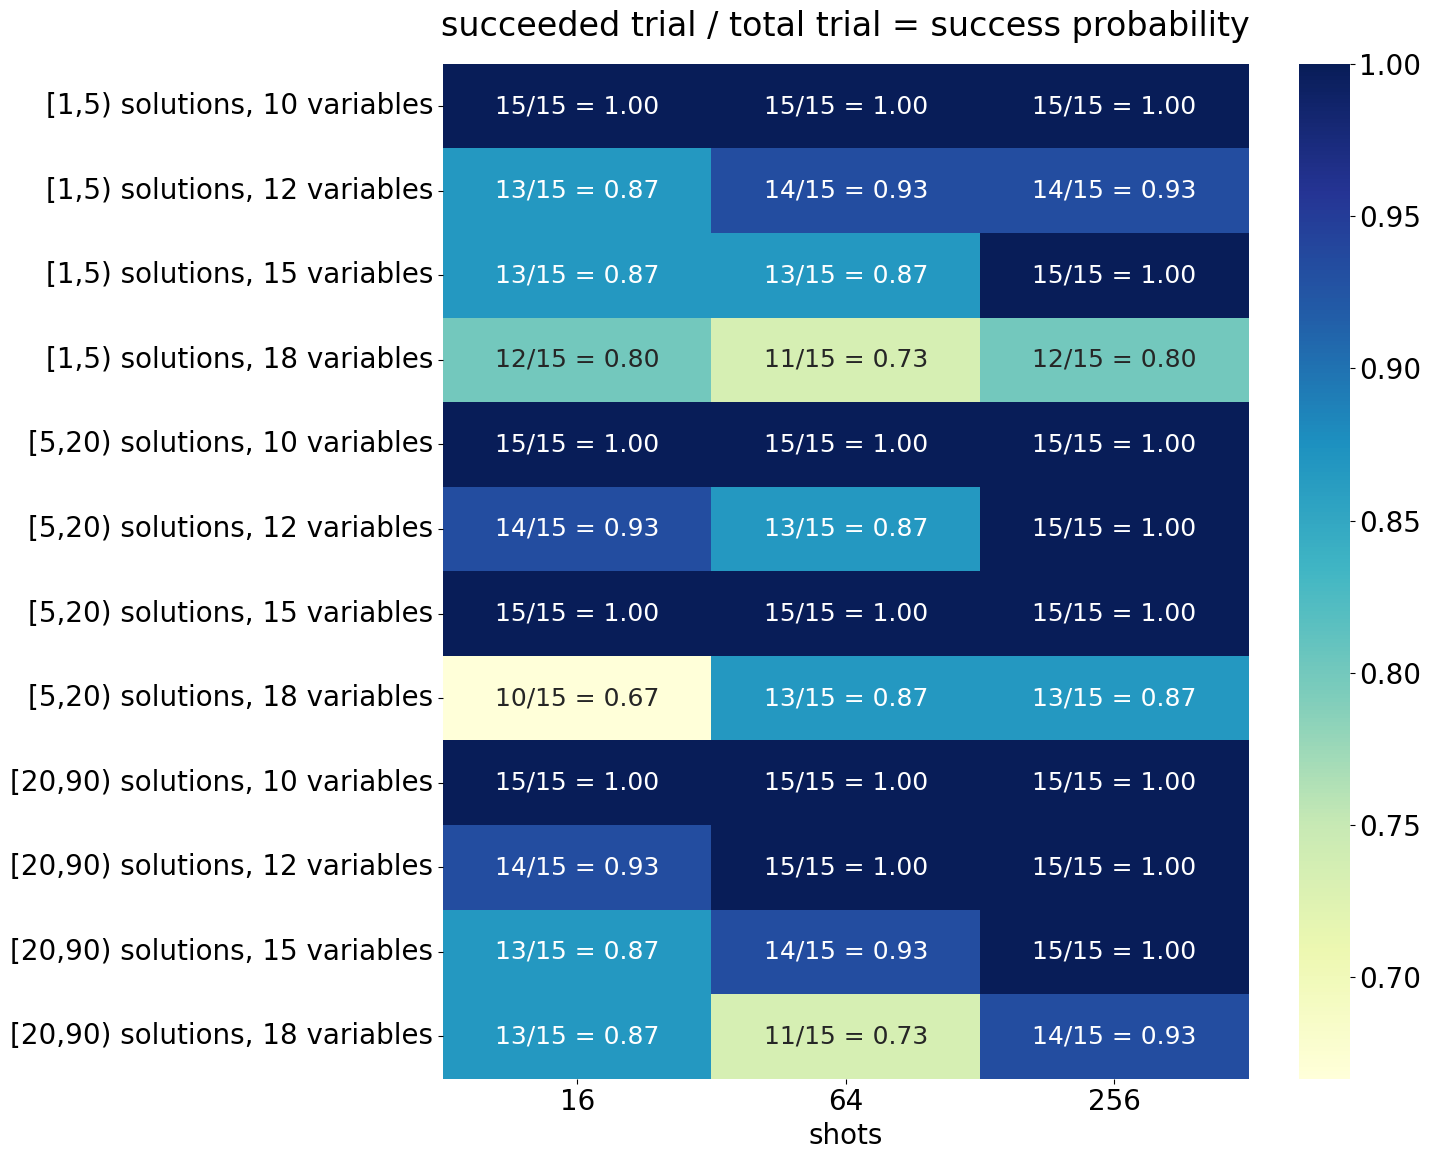

In [22]:
# plot heatmap using seaborn from df2
plt.rcParams.update({'font.size': 20, 'text.usetex': False})
figure = plt.figure(figsize=(15,12))
ax = plt.gca()
gpmap = {1: "[1,5) solutions", 2: "[5,20) solutions", 3: "[20,90) solutions"}
yticklabels = [f"{gpmap[i]}, {j} variables" for i in [1,2,3] for j in [10,12,15,18] ]
sns.heatmap(df2, cmap="YlGnBu", fmt="s", yticklabels=yticklabels, ax=ax, annot=annot, annot_kws={"fontsize": 18})
ax.set_ylabel("")
# plt.tight_layout()
plt.title("succeeded trial / total trial = success probability", fontsize=24, pad=20)
plt.tight_layout()
plt.savefig("../figure/failure-prob.pdf")